In [1]:
import tftables
import tensorflow as tf
import numpy as np
import time
from vae import VariationalAutoencoder

%load_ext autoreload
%autoreload 2

In [2]:
network_architecture = {
    "input_size": 50000,
    "latent_representation_size": 40,
    "encoder_layer_sizes": [50000, 100, 100, 90, 90, 80, 80, 80],
    "decoder_layer_sizes": [40, 80, 80, 90, 90, 100, 100, 50000],
    "metals_predictor_layer_sizes": [40, 20, 20, 20, 10, 10, 10, 5, 2]
}
learning_rate = .0005
batch_size = 50

vae = VariationalAutoencoder(network_architecture, learning_rate=learning_rate, batch_size=batch_size)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [3]:
training_epochs = 200
n_samples = 8000
total_batches = int(n_samples / batch_size)
display_step = 10

previous_time = time.time()
for epoch in range(training_epochs):
    for batch in range(total_batches):
        _, cost, l1_loss, r_cost, l_cost, _, m_cost = vae.optimize()
        
        if batch % display_step == display_step - 1:
            print("E%02d" % (epoch+1), "B%03d" % (batch+1),
                  "Iter", "%06d" % (epoch * total_batches + (batch+1)), "|", 
                  "r_cost={:.3f}".format(r_cost),
                  "l_cost={:.3f}".format(l_cost),
                  "l1_loss={:.3f}".format(l1_loss),
                  "m_cost={:.3f}".format(m_cost),
                  "time={:.1f}".format(time.time() - previous_time))
            previous_time = time.time()

E01 B010 Iter 000010 | r_cost=409796.938 l_cost=22641.723 l1_loss=0.309 m_cost=1.431 time=7.5
E01 B020 Iter 000020 | r_cost=304003.250 l_cost=10554.063 l1_loss=0.187 m_cost=1.174 time=9.3
E01 B030 Iter 000030 | r_cost=290336.344 l_cost=8002.438 l1_loss=0.182 m_cost=1.025 time=9.3
E02 B020 Iter 000180 | r_cost=88733.234 l_cost=5294.932 l1_loss=0.085 m_cost=0.790 time=9.0
E02 B030 Iter 000190 | r_cost=82879.227 l_cost=4594.741 l1_loss=0.079 m_cost=0.717 time=8.9
E02 B040 Iter 000200 | r_cost=78405.930 l_cost=4721.667 l1_loss=0.070 m_cost=0.926 time=8.8
E02 B050 Iter 000210 | r_cost=75387.633 l_cost=4625.240 l1_loss=0.071 m_cost=0.742 time=9.0
E02 B060 Iter 000220 | r_cost=73476.438 l_cost=4220.456 l1_loss=0.068 m_cost=0.674 time=9.1
E02 B070 Iter 000230 | r_cost=71678.977 l_cost=4084.823 l1_loss=0.075 m_cost=0.747 time=8.8
E02 B080 Iter 000240 | r_cost=70532.586 l_cost=3963.515 l1_loss=0.062 m_cost=0.579 time=9.0
E02 B090 Iter 000250 | r_cost=70256.953 l_cost=4194.648 l1_loss=0.072 m_cos

E07 B080 Iter 001040 | r_cost=40446.375 l_cost=3196.703 l1_loss=0.052 m_cost=0.472 time=8.9
E07 B090 Iter 001050 | r_cost=38595.230 l_cost=3366.209 l1_loss=0.048 m_cost=0.780 time=8.7
E07 B100 Iter 001060 | r_cost=39783.512 l_cost=3268.634 l1_loss=0.053 m_cost=0.543 time=8.9
E07 B110 Iter 001070 | r_cost=39732.414 l_cost=3522.435 l1_loss=0.058 m_cost=0.564 time=9.0
E07 B120 Iter 001080 | r_cost=41419.020 l_cost=3157.577 l1_loss=0.055 m_cost=0.766 time=8.9
E07 B130 Iter 001090 | r_cost=39208.926 l_cost=3098.553 l1_loss=0.051 m_cost=0.690 time=9.1
E07 B140 Iter 001100 | r_cost=38561.574 l_cost=3071.583 l1_loss=0.047 m_cost=0.725 time=8.9
E07 B150 Iter 001110 | r_cost=39545.465 l_cost=3157.856 l1_loss=0.051 m_cost=0.455 time=9.0
E07 B160 Iter 001120 | r_cost=39734.984 l_cost=3166.526 l1_loss=0.053 m_cost=0.644 time=8.8
E08 B010 Iter 001130 | r_cost=41162.488 l_cost=3093.745 l1_loss=0.056 m_cost=0.474 time=8.9
E08 B020 Iter 001140 | r_cost=36294.453 l_cost=3427.182 l1_loss=0.049 m_cost=0.5

E13 B020 Iter 001940 | r_cost=27336.705 l_cost=3113.935 l1_loss=0.042 m_cost=0.560 time=8.8
E13 B030 Iter 001950 | r_cost=30195.053 l_cost=3082.194 l1_loss=0.048 m_cost=0.580 time=8.8
E13 B040 Iter 001960 | r_cost=29280.941 l_cost=2895.519 l1_loss=0.042 m_cost=0.690 time=9.0
E13 B050 Iter 001970 | r_cost=29589.535 l_cost=2809.192 l1_loss=0.041 m_cost=0.630 time=9.0
E13 B060 Iter 001980 | r_cost=29689.068 l_cost=2874.886 l1_loss=0.045 m_cost=0.595 time=8.8
E13 B070 Iter 001990 | r_cost=30135.162 l_cost=2923.152 l1_loss=0.050 m_cost=0.568 time=8.7
E13 B080 Iter 002000 | r_cost=29222.740 l_cost=2711.588 l1_loss=0.044 m_cost=0.435 time=8.9
E13 B090 Iter 002010 | r_cost=28734.934 l_cost=2797.248 l1_loss=0.045 m_cost=0.727 time=8.8
E13 B100 Iter 002020 | r_cost=29650.457 l_cost=2729.686 l1_loss=0.046 m_cost=0.527 time=9.0
E13 B110 Iter 002030 | r_cost=32436.143 l_cost=2834.407 l1_loss=0.052 m_cost=0.561 time=9.0
E13 B120 Iter 002040 | r_cost=30141.598 l_cost=2684.941 l1_loss=0.047 m_cost=0.6

E18 B120 Iter 002840 | r_cost=26756.074 l_cost=2351.704 l1_loss=0.044 m_cost=0.657 time=9.1
E18 B130 Iter 002850 | r_cost=24937.568 l_cost=2312.778 l1_loss=0.038 m_cost=0.747 time=8.8
E18 B140 Iter 002860 | r_cost=25103.088 l_cost=2282.416 l1_loss=0.037 m_cost=0.636 time=8.9
E18 B150 Iter 002870 | r_cost=24739.830 l_cost=2344.872 l1_loss=0.036 m_cost=0.501 time=8.9
E18 B160 Iter 002880 | r_cost=24733.604 l_cost=2322.626 l1_loss=0.038 m_cost=0.653 time=9.0
E19 B010 Iter 002890 | r_cost=24800.625 l_cost=2344.826 l1_loss=0.038 m_cost=0.430 time=9.0
E19 B020 Iter 002900 | r_cost=23734.406 l_cost=2495.090 l1_loss=0.038 m_cost=0.554 time=9.0
E19 B030 Iter 002910 | r_cost=25144.529 l_cost=2552.204 l1_loss=0.041 m_cost=0.579 time=8.7
E19 B040 Iter 002920 | r_cost=24244.506 l_cost=2336.765 l1_loss=0.036 m_cost=0.667 time=9.0
E19 B050 Iter 002930 | r_cost=24461.445 l_cost=2265.614 l1_loss=0.036 m_cost=0.620 time=8.9
E19 B060 Iter 002940 | r_cost=24398.627 l_cost=2310.706 l1_loss=0.038 m_cost=0.4

E25 B030 Iter 003870 | r_cost=21265.932 l_cost=2124.037 l1_loss=0.035 m_cost=0.441 time=8.9
E25 B040 Iter 003880 | r_cost=20631.969 l_cost=2015.586 l1_loss=0.032 m_cost=0.410 time=8.9
E25 B050 Iter 003890 | r_cost=20997.840 l_cost=1944.623 l1_loss=0.031 m_cost=0.516 time=8.7
E25 B060 Iter 003900 | r_cost=20816.381 l_cost=1993.526 l1_loss=0.033 m_cost=0.410 time=8.8
E25 B070 Iter 003910 | r_cost=21484.477 l_cost=2122.419 l1_loss=0.038 m_cost=0.546 time=8.7
E25 B080 Iter 003920 | r_cost=20990.943 l_cost=2006.396 l1_loss=0.032 m_cost=0.350 time=8.9
E25 B090 Iter 003930 | r_cost=20659.559 l_cost=2109.452 l1_loss=0.034 m_cost=0.478 time=9.0
E25 B100 Iter 003940 | r_cost=20626.156 l_cost=2054.476 l1_loss=0.034 m_cost=0.379 time=8.9
E25 B110 Iter 003950 | r_cost=23255.551 l_cost=2217.084 l1_loss=0.042 m_cost=0.401 time=9.0
E25 B120 Iter 003960 | r_cost=21569.967 l_cost=2019.146 l1_loss=0.035 m_cost=0.494 time=8.9
E25 B130 Iter 003970 | r_cost=21076.982 l_cost=1953.373 l1_loss=0.033 m_cost=0.4

E30 B130 Iter 004770 | r_cost=17027.100 l_cost=1726.233 l1_loss=0.028 m_cost=0.380 time=8.8
E30 B140 Iter 004780 | r_cost=17691.684 l_cost=1715.524 l1_loss=0.029 m_cost=0.299 time=9.1
E30 B150 Iter 004790 | r_cost=17519.449 l_cost=1779.547 l1_loss=0.028 m_cost=0.280 time=9.1
E30 B160 Iter 004800 | r_cost=17421.367 l_cost=1777.689 l1_loss=0.029 m_cost=0.338 time=8.8
E31 B010 Iter 004810 | r_cost=16488.719 l_cost=1785.099 l1_loss=0.027 m_cost=0.362 time=10.1
E31 B020 Iter 004820 | r_cost=16055.545 l_cost=1929.614 l1_loss=0.029 m_cost=0.333 time=8.9
E31 B030 Iter 004830 | r_cost=16842.205 l_cost=1950.814 l1_loss=0.030 m_cost=0.335 time=8.8
E31 B040 Iter 004840 | r_cost=16339.976 l_cost=1761.663 l1_loss=0.026 m_cost=0.311 time=9.0
E31 B050 Iter 004850 | r_cost=16872.826 l_cost=1718.230 l1_loss=0.026 m_cost=0.378 time=8.9
E31 B060 Iter 004860 | r_cost=16790.795 l_cost=1754.018 l1_loss=0.027 m_cost=0.426 time=9.0
E31 B070 Iter 004870 | r_cost=16640.797 l_cost=1921.289 l1_loss=0.032 m_cost=0.

E36 B070 Iter 005670 | r_cost=14562.851 l_cost=1829.549 l1_loss=0.029 m_cost=0.386 time=9.0
E36 B080 Iter 005680 | r_cost=14252.129 l_cost=1747.598 l1_loss=0.024 m_cost=0.242 time=9.0
E36 B090 Iter 005690 | r_cost=14206.587 l_cost=1819.171 l1_loss=0.025 m_cost=0.334 time=9.1
E36 B100 Iter 005700 | r_cost=14186.122 l_cost=1761.529 l1_loss=0.024 m_cost=0.219 time=8.7
E36 B110 Iter 005710 | r_cost=14719.495 l_cost=1840.103 l1_loss=0.028 m_cost=0.357 time=9.2
E36 B120 Iter 005720 | r_cost=15050.530 l_cost=1719.836 l1_loss=0.026 m_cost=0.331 time=8.9
E36 B130 Iter 005730 | r_cost=14217.874 l_cost=1698.501 l1_loss=0.025 m_cost=0.363 time=8.9
E36 B140 Iter 005740 | r_cost=14710.692 l_cost=1704.285 l1_loss=0.025 m_cost=0.322 time=9.1
E36 B150 Iter 005750 | r_cost=14944.438 l_cost=1739.427 l1_loss=0.024 m_cost=0.324 time=8.9
E36 B160 Iter 005760 | r_cost=14327.380 l_cost=1726.315 l1_loss=0.025 m_cost=0.282 time=8.8
E37 B010 Iter 005770 | r_cost=14102.419 l_cost=1720.034 l1_loss=0.026 m_cost=0.2

E42 B010 Iter 006570 | r_cost=13455.481 l_cost=1696.610 l1_loss=0.028 m_cost=0.284 time=8.8
E42 B020 Iter 006580 | r_cost=12715.563 l_cost=1823.269 l1_loss=0.026 m_cost=0.323 time=9.2
E42 B030 Iter 006590 | r_cost=13263.695 l_cost=1794.161 l1_loss=0.025 m_cost=0.299 time=9.0
E42 B040 Iter 006600 | r_cost=13101.142 l_cost=1693.673 l1_loss=0.023 m_cost=0.253 time=8.9
E42 B050 Iter 006610 | r_cost=13449.498 l_cost=1677.368 l1_loss=0.023 m_cost=0.366 time=9.2
E42 B060 Iter 006620 | r_cost=13164.725 l_cost=1689.301 l1_loss=0.024 m_cost=0.326 time=8.7
E42 B070 Iter 006630 | r_cost=12768.605 l_cost=1779.012 l1_loss=0.025 m_cost=0.343 time=9.1
E42 B080 Iter 006640 | r_cost=12915.357 l_cost=1704.818 l1_loss=0.023 m_cost=0.223 time=8.8
E42 B090 Iter 006650 | r_cost=13237.577 l_cost=1780.610 l1_loss=0.025 m_cost=0.334 time=9.0
E42 B100 Iter 006660 | r_cost=13022.444 l_cost=1722.965 l1_loss=0.024 m_cost=0.221 time=8.8
E42 B110 Iter 006670 | r_cost=13136.615 l_cost=1770.870 l1_loss=0.026 m_cost=0.3

E47 B110 Iter 007470 | r_cost=12190.808 l_cost=1718.777 l1_loss=0.024 m_cost=0.336 time=9.2
E47 B120 Iter 007480 | r_cost=12750.839 l_cost=1673.354 l1_loss=0.023 m_cost=0.317 time=9.2
E47 B130 Iter 007490 | r_cost=11924.331 l_cost=1659.993 l1_loss=0.021 m_cost=0.339 time=8.7
E47 B140 Iter 007500 | r_cost=12925.183 l_cost=1666.581 l1_loss=0.025 m_cost=0.349 time=8.8
E47 B150 Iter 007510 | r_cost=12889.932 l_cost=1674.910 l1_loss=0.022 m_cost=0.231 time=9.0
E47 B160 Iter 007520 | r_cost=12679.613 l_cost=1673.731 l1_loss=0.024 m_cost=0.271 time=8.8
E48 B010 Iter 007530 | r_cost=12976.059 l_cost=1704.579 l1_loss=0.028 m_cost=0.290 time=8.9
E48 B020 Iter 007540 | r_cost=11883.196 l_cost=1774.562 l1_loss=0.025 m_cost=0.294 time=9.1
E48 B030 Iter 007550 | r_cost=13410.466 l_cost=1758.991 l1_loss=0.027 m_cost=0.297 time=9.0
E48 B040 Iter 007560 | r_cost=12686.999 l_cost=1704.983 l1_loss=0.026 m_cost=0.278 time=8.7
E48 B050 Iter 007570 | r_cost=13167.155 l_cost=1683.245 l1_loss=0.024 m_cost=0.4

E53 B050 Iter 008370 | r_cost=11620.454 l_cost=1649.236 l1_loss=0.021 m_cost=0.374 time=9.0
E53 B060 Iter 008380 | r_cost=11437.321 l_cost=1663.484 l1_loss=0.023 m_cost=0.293 time=8.9
E53 B070 Iter 008390 | r_cost=10928.180 l_cost=1709.801 l1_loss=0.023 m_cost=0.386 time=8.9
E53 B080 Iter 008400 | r_cost=11170.910 l_cost=1670.787 l1_loss=0.021 m_cost=0.226 time=8.9
E53 B090 Iter 008410 | r_cost=11456.955 l_cost=1702.222 l1_loss=0.023 m_cost=0.354 time=8.9
E53 B100 Iter 008420 | r_cost=11196.890 l_cost=1663.095 l1_loss=0.021 m_cost=0.229 time=8.8
E53 B110 Iter 008430 | r_cost=11325.584 l_cost=1691.008 l1_loss=0.023 m_cost=0.322 time=9.1
E53 B120 Iter 008440 | r_cost=11888.582 l_cost=1660.186 l1_loss=0.022 m_cost=0.295 time=9.0
E53 B130 Iter 008450 | r_cost=11091.462 l_cost=1644.340 l1_loss=0.020 m_cost=0.335 time=8.9
E53 B140 Iter 008460 | r_cost=11766.268 l_cost=1645.617 l1_loss=0.022 m_cost=0.254 time=8.8
E53 B150 Iter 008470 | r_cost=11841.551 l_cost=1660.261 l1_loss=0.021 m_cost=0.2

E58 B150 Iter 009270 | r_cost=10910.737 l_cost=1649.447 l1_loss=0.019 m_cost=0.233 time=9.0
E58 B160 Iter 009280 | r_cost=10622.266 l_cost=1648.490 l1_loss=0.021 m_cost=0.233 time=8.8
E59 B010 Iter 009290 | r_cost=10497.221 l_cost=1650.167 l1_loss=0.020 m_cost=0.330 time=8.9
E59 B020 Iter 009300 | r_cost=10259.297 l_cost=1705.234 l1_loss=0.021 m_cost=0.295 time=8.7
E59 B030 Iter 009310 | r_cost=10634.860 l_cost=1710.327 l1_loss=0.022 m_cost=0.293 time=8.9
E59 B040 Iter 009320 | r_cost=10397.276 l_cost=1647.577 l1_loss=0.020 m_cost=0.213 time=8.9
E59 B050 Iter 009330 | r_cost=10876.620 l_cost=1640.972 l1_loss=0.021 m_cost=0.451 time=8.9
E59 B060 Iter 009340 | r_cost=10592.421 l_cost=1658.610 l1_loss=0.021 m_cost=0.306 time=9.2
E59 B070 Iter 009350 | r_cost=10423.084 l_cost=1687.127 l1_loss=0.025 m_cost=0.363 time=8.7
E59 B080 Iter 009360 | r_cost=10417.771 l_cost=1667.188 l1_loss=0.020 m_cost=0.250 time=8.9
E59 B090 Iter 009370 | r_cost=10602.094 l_cost=1688.953 l1_loss=0.023 m_cost=0.3

E64 B090 Iter 010170 | r_cost=9811.463 l_cost=1676.156 l1_loss=0.021 m_cost=0.359 time=9.0
E64 B100 Iter 010180 | r_cost=9511.500 l_cost=1652.212 l1_loss=0.019 m_cost=0.231 time=8.9
E64 B110 Iter 010190 | r_cost=9741.581 l_cost=1682.261 l1_loss=0.021 m_cost=0.322 time=8.8
E64 B120 Iter 010200 | r_cost=10090.057 l_cost=1640.476 l1_loss=0.020 m_cost=0.262 time=9.1
E64 B130 Iter 010210 | r_cost=9514.078 l_cost=1632.987 l1_loss=0.017 m_cost=0.321 time=9.0
E64 B140 Iter 010220 | r_cost=10466.651 l_cost=1648.998 l1_loss=0.023 m_cost=0.257 time=8.9
E64 B150 Iter 010230 | r_cost=9970.785 l_cost=1652.785 l1_loss=0.019 m_cost=0.221 time=8.9
E64 B160 Iter 010240 | r_cost=9594.649 l_cost=1646.013 l1_loss=0.019 m_cost=0.254 time=9.1
E65 B010 Iter 010250 | r_cost=9588.653 l_cost=1637.710 l1_loss=0.020 m_cost=0.266 time=8.9
E65 B020 Iter 010260 | r_cost=9247.887 l_cost=1687.607 l1_loss=0.019 m_cost=0.292 time=8.8
E65 B030 Iter 010270 | r_cost=9466.400 l_cost=1679.535 l1_loss=0.020 m_cost=0.264 time=8

E70 B030 Iter 011070 | r_cost=8829.800 l_cost=1679.759 l1_loss=0.019 m_cost=0.273 time=9.0
E70 B040 Iter 011080 | r_cost=8878.137 l_cost=1629.034 l1_loss=0.018 m_cost=0.206 time=8.9
E70 B050 Iter 011090 | r_cost=9154.046 l_cost=1623.109 l1_loss=0.018 m_cost=0.327 time=9.1
E70 B060 Iter 011100 | r_cost=8950.688 l_cost=1647.274 l1_loss=0.018 m_cost=0.315 time=8.8
E70 B070 Iter 011110 | r_cost=8601.637 l_cost=1665.581 l1_loss=0.019 m_cost=0.310 time=8.9
E70 B080 Iter 011120 | r_cost=8772.825 l_cost=1637.513 l1_loss=0.017 m_cost=0.231 time=9.0
E70 B090 Iter 011130 | r_cost=9078.996 l_cost=1663.301 l1_loss=0.020 m_cost=0.275 time=9.0
E70 B100 Iter 011140 | r_cost=8775.018 l_cost=1644.907 l1_loss=0.018 m_cost=0.193 time=8.9
E70 B110 Iter 011150 | r_cost=9235.663 l_cost=1663.371 l1_loss=0.022 m_cost=0.332 time=8.9
E70 B120 Iter 011160 | r_cost=9329.746 l_cost=1634.580 l1_loss=0.019 m_cost=0.254 time=9.1
E70 B130 Iter 011170 | r_cost=8884.021 l_cost=1637.559 l1_loss=0.017 m_cost=0.321 time=8.8

E75 B140 Iter 011980 | r_cost=8701.390 l_cost=1620.706 l1_loss=0.017 m_cost=0.215 time=9.0
E75 B150 Iter 011990 | r_cost=8704.375 l_cost=1628.628 l1_loss=0.017 m_cost=0.210 time=9.0
E75 B160 Iter 012000 | r_cost=8360.239 l_cost=1625.230 l1_loss=0.017 m_cost=0.237 time=8.8
E76 B010 Iter 012010 | r_cost=8335.008 l_cost=1629.340 l1_loss=0.017 m_cost=0.229 time=9.1
E76 B020 Iter 012020 | r_cost=8214.670 l_cost=1664.797 l1_loss=0.018 m_cost=0.267 time=9.1
E76 B030 Iter 012030 | r_cost=8626.470 l_cost=1663.053 l1_loss=0.020 m_cost=0.250 time=9.1
E76 B040 Iter 012040 | r_cost=8517.498 l_cost=1624.359 l1_loss=0.019 m_cost=0.220 time=9.1
E76 B050 Iter 012050 | r_cost=8524.868 l_cost=1628.341 l1_loss=0.017 m_cost=0.328 time=9.0
E76 B060 Iter 012060 | r_cost=8336.903 l_cost=1640.807 l1_loss=0.017 m_cost=0.275 time=8.8
E76 B070 Iter 012070 | r_cost=8033.747 l_cost=1653.955 l1_loss=0.018 m_cost=0.332 time=8.8
E76 B080 Iter 012080 | r_cost=8096.813 l_cost=1631.551 l1_loss=0.016 m_cost=0.198 time=8.8

E81 B090 Iter 012890 | r_cost=8162.327 l_cost=1648.111 l1_loss=0.017 m_cost=0.270 time=9.2
E81 B100 Iter 012900 | r_cost=7916.222 l_cost=1633.820 l1_loss=0.015 m_cost=0.167 time=8.9
E81 B110 Iter 012910 | r_cost=8162.576 l_cost=1636.779 l1_loss=0.018 m_cost=0.296 time=9.0
E81 B120 Iter 012920 | r_cost=8531.189 l_cost=1629.224 l1_loss=0.017 m_cost=0.212 time=8.9
E81 B130 Iter 012930 | r_cost=8146.965 l_cost=1618.417 l1_loss=0.016 m_cost=0.283 time=8.7
E81 B140 Iter 012940 | r_cost=8563.791 l_cost=1623.443 l1_loss=0.018 m_cost=0.207 time=9.0
E81 B150 Iter 012950 | r_cost=8545.661 l_cost=1626.069 l1_loss=0.018 m_cost=0.218 time=9.0
E81 B160 Iter 012960 | r_cost=8017.905 l_cost=1624.745 l1_loss=0.017 m_cost=0.216 time=8.8
E82 B010 Iter 012970 | r_cost=7930.229 l_cost=1622.456 l1_loss=0.016 m_cost=0.245 time=8.8
E82 B020 Iter 012980 | r_cost=7861.420 l_cost=1651.646 l1_loss=0.018 m_cost=0.235 time=9.0
E82 B030 Iter 012990 | r_cost=8209.794 l_cost=1655.783 l1_loss=0.019 m_cost=0.274 time=8.8

E87 B040 Iter 013800 | r_cost=7608.042 l_cost=1612.488 l1_loss=0.015 m_cost=0.195 time=8.9
E87 B050 Iter 013810 | r_cost=7879.923 l_cost=1613.827 l1_loss=0.016 m_cost=0.267 time=9.0
E87 B060 Iter 013820 | r_cost=7735.327 l_cost=1626.596 l1_loss=0.016 m_cost=0.244 time=8.9
E87 B070 Iter 013830 | r_cost=7461.790 l_cost=1638.078 l1_loss=0.016 m_cost=0.251 time=8.8
E87 B080 Iter 013840 | r_cost=7462.904 l_cost=1618.571 l1_loss=0.014 m_cost=0.188 time=9.0
E87 B090 Iter 013850 | r_cost=7721.835 l_cost=1636.805 l1_loss=0.016 m_cost=0.240 time=8.7
E87 B100 Iter 013860 | r_cost=7512.028 l_cost=1621.904 l1_loss=0.015 m_cost=0.175 time=9.0
E87 B110 Iter 013870 | r_cost=7768.420 l_cost=1628.439 l1_loss=0.018 m_cost=0.279 time=9.1
E87 B120 Iter 013880 | r_cost=8089.981 l_cost=1615.844 l1_loss=0.016 m_cost=0.215 time=9.2
E87 B130 Iter 013890 | r_cost=7776.042 l_cost=1609.843 l1_loss=0.015 m_cost=0.246 time=8.9
E87 B140 Iter 013900 | r_cost=8007.036 l_cost=1616.577 l1_loss=0.016 m_cost=0.182 time=8.8

E92 B150 Iter 014710 | r_cost=7672.592 l_cost=1616.764 l1_loss=0.015 m_cost=0.206 time=8.9
E92 B160 Iter 014720 | r_cost=7445.993 l_cost=1616.755 l1_loss=0.016 m_cost=0.222 time=8.8
E93 B010 Iter 014730 | r_cost=7379.428 l_cost=1616.623 l1_loss=0.016 m_cost=0.205 time=8.9
E93 B020 Iter 014740 | r_cost=7170.466 l_cost=1638.593 l1_loss=0.016 m_cost=0.241 time=8.9
E93 B030 Iter 014750 | r_cost=7450.486 l_cost=1637.351 l1_loss=0.017 m_cost=0.220 time=9.0
E93 B040 Iter 014760 | r_cost=7463.067 l_cost=1611.343 l1_loss=0.015 m_cost=0.196 time=9.1
E93 B050 Iter 014770 | r_cost=7735.644 l_cost=1610.123 l1_loss=0.016 m_cost=0.254 time=9.1
E93 B060 Iter 014780 | r_cost=7774.346 l_cost=1628.498 l1_loss=0.018 m_cost=0.322 time=9.1
E93 B070 Iter 014790 | r_cost=7553.656 l_cost=1639.901 l1_loss=0.019 m_cost=0.322 time=8.8
E93 B080 Iter 014800 | r_cost=7359.195 l_cost=1618.774 l1_loss=0.016 m_cost=0.187 time=8.8
E93 B090 Iter 014810 | r_cost=7505.023 l_cost=1634.603 l1_loss=0.017 m_cost=0.270 time=9.0

E98 B100 Iter 015620 | r_cost=6927.531 l_cost=1622.329 l1_loss=0.014 m_cost=0.164 time=9.1
E98 B110 Iter 015630 | r_cost=7127.506 l_cost=1616.982 l1_loss=0.017 m_cost=0.185 time=8.8
E98 B120 Iter 015640 | r_cost=7506.024 l_cost=1612.260 l1_loss=0.015 m_cost=0.226 time=8.9
E98 B130 Iter 015650 | r_cost=7121.956 l_cost=1610.157 l1_loss=0.014 m_cost=0.233 time=8.9
E98 B140 Iter 015660 | r_cost=7337.640 l_cost=1610.390 l1_loss=0.015 m_cost=0.198 time=9.2
E98 B150 Iter 015670 | r_cost=7350.000 l_cost=1615.680 l1_loss=0.015 m_cost=0.191 time=8.9
E98 B160 Iter 015680 | r_cost=6954.899 l_cost=1610.931 l1_loss=0.014 m_cost=0.176 time=8.9
E99 B010 Iter 015690 | r_cost=7058.205 l_cost=1609.656 l1_loss=0.016 m_cost=0.217 time=8.9
E99 B020 Iter 015700 | r_cost=6744.353 l_cost=1634.699 l1_loss=0.015 m_cost=0.226 time=8.9
E99 B030 Iter 015710 | r_cost=6991.130 l_cost=1633.164 l1_loss=0.016 m_cost=0.224 time=9.0
E99 B040 Iter 015720 | r_cost=6911.429 l_cost=1611.214 l1_loss=0.014 m_cost=0.164 time=8.9

E104 B040 Iter 016520 | r_cost=6936.066 l_cost=1608.776 l1_loss=0.014 m_cost=0.165 time=8.9
E104 B050 Iter 016530 | r_cost=7084.918 l_cost=1603.854 l1_loss=0.014 m_cost=0.230 time=8.9
E104 B060 Iter 016540 | r_cost=7068.175 l_cost=1620.577 l1_loss=0.015 m_cost=0.198 time=8.8
E104 B070 Iter 016550 | r_cost=6951.200 l_cost=1629.735 l1_loss=0.017 m_cost=0.229 time=8.9
E104 B080 Iter 016560 | r_cost=6892.706 l_cost=1612.840 l1_loss=0.014 m_cost=0.171 time=9.0
E104 B090 Iter 016570 | r_cost=7054.838 l_cost=1630.773 l1_loss=0.016 m_cost=0.261 time=9.1
E104 B100 Iter 016580 | r_cost=6780.750 l_cost=1619.389 l1_loss=0.014 m_cost=0.178 time=9.0
E104 B110 Iter 016590 | r_cost=6900.744 l_cost=1619.726 l1_loss=0.016 m_cost=0.213 time=9.0
E104 B120 Iter 016600 | r_cost=7320.339 l_cost=1611.241 l1_loss=0.015 m_cost=0.222 time=9.2
E104 B130 Iter 016610 | r_cost=6894.235 l_cost=1604.458 l1_loss=0.014 m_cost=0.246 time=8.9
E104 B140 Iter 016620 | r_cost=7120.265 l_cost=1611.332 l1_loss=0.014 m_cost=0.1

E109 B140 Iter 017420 | r_cost=7008.785 l_cost=1609.020 l1_loss=0.015 m_cost=0.239 time=8.8
E109 B150 Iter 017430 | r_cost=7044.668 l_cost=1613.440 l1_loss=0.014 m_cost=0.303 time=9.1
E109 B160 Iter 017440 | r_cost=6658.752 l_cost=1608.574 l1_loss=0.013 m_cost=0.148 time=8.8
E110 B010 Iter 017450 | r_cost=6633.191 l_cost=1607.344 l1_loss=0.014 m_cost=0.170 time=8.9
E110 B020 Iter 017460 | r_cost=6476.678 l_cost=1629.180 l1_loss=0.014 m_cost=0.215 time=9.1
E110 B030 Iter 017470 | r_cost=6721.243 l_cost=1626.264 l1_loss=0.016 m_cost=0.216 time=8.8
E110 B040 Iter 017480 | r_cost=6952.043 l_cost=1607.137 l1_loss=0.015 m_cost=0.181 time=8.9
E110 B050 Iter 017490 | r_cost=6812.166 l_cost=1608.195 l1_loss=0.014 m_cost=0.213 time=9.1
E110 B060 Iter 017500 | r_cost=6839.584 l_cost=1609.101 l1_loss=0.015 m_cost=0.219 time=8.9
E110 B070 Iter 017510 | r_cost=6957.491 l_cost=1628.211 l1_loss=0.018 m_cost=0.301 time=9.0
E110 B080 Iter 017520 | r_cost=6744.750 l_cost=1614.733 l1_loss=0.015 m_cost=0.1

E115 B080 Iter 018320 | r_cost=6592.404 l_cost=1608.695 l1_loss=0.014 m_cost=0.182 time=8.9
E115 B090 Iter 018330 | r_cost=6806.327 l_cost=1622.271 l1_loss=0.016 m_cost=0.270 time=8.8
E115 B100 Iter 018340 | r_cost=6589.688 l_cost=1612.845 l1_loss=0.014 m_cost=0.169 time=8.9
E115 B110 Iter 018350 | r_cost=6642.778 l_cost=1613.813 l1_loss=0.016 m_cost=0.246 time=8.9
E115 B120 Iter 018360 | r_cost=6992.617 l_cost=1609.711 l1_loss=0.014 m_cost=0.178 time=8.8
E115 B130 Iter 018370 | r_cost=6625.486 l_cost=1605.188 l1_loss=0.013 m_cost=0.210 time=9.0
E115 B140 Iter 018380 | r_cost=6823.281 l_cost=1607.825 l1_loss=0.014 m_cost=0.206 time=9.0
E115 B150 Iter 018390 | r_cost=6784.503 l_cost=1609.646 l1_loss=0.013 m_cost=0.205 time=9.0
E115 B160 Iter 018400 | r_cost=6711.453 l_cost=1605.158 l1_loss=0.016 m_cost=0.158 time=8.8
E116 B010 Iter 018410 | r_cost=6639.340 l_cost=1610.898 l1_loss=0.015 m_cost=0.222 time=8.8
E116 B020 Iter 018420 | r_cost=6477.961 l_cost=1632.416 l1_loss=0.015 m_cost=0.2

E121 B020 Iter 019220 | r_cost=6356.236 l_cost=1621.458 l1_loss=0.014 m_cost=0.226 time=9.0
E121 B030 Iter 019230 | r_cost=6404.942 l_cost=1620.363 l1_loss=0.014 m_cost=0.223 time=8.7
E121 B040 Iter 019240 | r_cost=6493.508 l_cost=1604.964 l1_loss=0.013 m_cost=0.152 time=9.1
E121 B050 Iter 019250 | r_cost=6616.884 l_cost=1602.973 l1_loss=0.013 m_cost=0.217 time=8.9
E121 B060 Iter 019260 | r_cost=6641.552 l_cost=1607.200 l1_loss=0.014 m_cost=0.183 time=8.7
E121 B070 Iter 019270 | r_cost=6537.463 l_cost=1620.386 l1_loss=0.016 m_cost=0.194 time=8.9
E121 B080 Iter 019280 | r_cost=6525.002 l_cost=1606.540 l1_loss=0.014 m_cost=0.187 time=8.9
E121 B090 Iter 019290 | r_cost=6690.429 l_cost=1613.287 l1_loss=0.015 m_cost=0.234 time=9.0
E121 B100 Iter 019300 | r_cost=6555.055 l_cost=1613.331 l1_loss=0.014 m_cost=0.160 time=8.9
E121 B110 Iter 019310 | r_cost=6511.715 l_cost=1613.418 l1_loss=0.015 m_cost=0.252 time=8.8
E121 B120 Iter 019320 | r_cost=6978.298 l_cost=1607.719 l1_loss=0.014 m_cost=0.1

E126 B120 Iter 020120 | r_cost=6967.297 l_cost=1606.573 l1_loss=0.014 m_cost=0.186 time=8.8
E126 B130 Iter 020130 | r_cost=6500.603 l_cost=1603.618 l1_loss=0.013 m_cost=0.230 time=8.9
E126 B140 Iter 020140 | r_cost=6633.177 l_cost=1608.481 l1_loss=0.014 m_cost=0.233 time=9.0
E126 B150 Iter 020150 | r_cost=6620.165 l_cost=1606.341 l1_loss=0.013 m_cost=0.186 time=8.8
E126 B160 Iter 020160 | r_cost=6523.030 l_cost=1606.479 l1_loss=0.014 m_cost=0.142 time=9.0
E127 B010 Iter 020170 | r_cost=6544.200 l_cost=1608.075 l1_loss=0.015 m_cost=0.195 time=8.7
E127 B020 Iter 020180 | r_cost=6193.804 l_cost=1621.604 l1_loss=0.014 m_cost=0.212 time=8.8
E127 B030 Iter 020190 | r_cost=6338.033 l_cost=1616.440 l1_loss=0.015 m_cost=0.214 time=8.8
E127 B040 Iter 020200 | r_cost=6535.893 l_cost=1603.861 l1_loss=0.014 m_cost=0.160 time=8.9
E127 B050 Iter 020210 | r_cost=6556.202 l_cost=1604.183 l1_loss=0.013 m_cost=0.234 time=8.8
E127 B060 Iter 020220 | r_cost=6523.697 l_cost=1604.509 l1_loss=0.014 m_cost=0.1

E132 B060 Iter 021020 | r_cost=6550.957 l_cost=1603.659 l1_loss=0.014 m_cost=0.189 time=9.2
E132 B070 Iter 021030 | r_cost=6475.577 l_cost=1611.461 l1_loss=0.016 m_cost=0.266 time=8.7
E132 B080 Iter 021040 | r_cost=6384.131 l_cost=1605.434 l1_loss=0.013 m_cost=0.170 time=8.9
E132 B090 Iter 021050 | r_cost=6469.960 l_cost=1611.584 l1_loss=0.014 m_cost=0.263 time=8.9
E132 B100 Iter 021060 | r_cost=6231.249 l_cost=1606.684 l1_loss=0.012 m_cost=0.191 time=8.9
E132 B110 Iter 021070 | r_cost=6228.720 l_cost=1608.178 l1_loss=0.014 m_cost=0.232 time=8.9
E132 B120 Iter 021080 | r_cost=6834.681 l_cost=1602.685 l1_loss=0.015 m_cost=0.203 time=8.9
E132 B130 Iter 021090 | r_cost=6449.228 l_cost=1601.126 l1_loss=0.013 m_cost=0.175 time=8.8
E132 B140 Iter 021100 | r_cost=6645.346 l_cost=1602.470 l1_loss=0.013 m_cost=0.252 time=9.0
E132 B150 Iter 021110 | r_cost=6644.239 l_cost=1603.827 l1_loss=0.014 m_cost=0.155 time=8.8
E132 B160 Iter 021120 | r_cost=6298.698 l_cost=1602.324 l1_loss=0.013 m_cost=0.1

E137 B160 Iter 021920 | r_cost=6188.870 l_cost=1601.751 l1_loss=0.013 m_cost=0.171 time=8.9
E138 B010 Iter 021930 | r_cost=6370.412 l_cost=1607.254 l1_loss=0.015 m_cost=0.223 time=9.0
E138 B020 Iter 021940 | r_cost=6166.891 l_cost=1612.615 l1_loss=0.015 m_cost=0.210 time=8.9
E138 B030 Iter 021950 | r_cost=6238.132 l_cost=1609.674 l1_loss=0.014 m_cost=0.209 time=9.0
E138 B040 Iter 021960 | r_cost=6198.101 l_cost=1601.895 l1_loss=0.012 m_cost=0.169 time=8.9
E138 B050 Iter 021970 | r_cost=6314.632 l_cost=1601.948 l1_loss=0.013 m_cost=0.218 time=9.0
E138 B060 Iter 021980 | r_cost=6412.367 l_cost=1603.416 l1_loss=0.014 m_cost=0.197 time=9.0
E138 B070 Iter 021990 | r_cost=6346.412 l_cost=1614.751 l1_loss=0.016 m_cost=0.220 time=8.9
E138 B080 Iter 022000 | r_cost=6318.238 l_cost=1604.250 l1_loss=0.014 m_cost=0.181 time=8.8
E138 B090 Iter 022010 | r_cost=6402.136 l_cost=1610.190 l1_loss=0.015 m_cost=0.238 time=8.9
E138 B100 Iter 022020 | r_cost=6196.675 l_cost=1605.665 l1_loss=0.014 m_cost=0.1

E143 B100 Iter 022820 | r_cost=6030.613 l_cost=1606.498 l1_loss=0.012 m_cost=0.134 time=8.8
E143 B110 Iter 022830 | r_cost=6196.285 l_cost=1607.720 l1_loss=0.015 m_cost=0.203 time=9.0
E143 B120 Iter 022840 | r_cost=6890.148 l_cost=1603.282 l1_loss=0.017 m_cost=0.175 time=8.8
E143 B130 Iter 022850 | r_cost=6286.275 l_cost=1600.654 l1_loss=0.014 m_cost=0.189 time=8.8
E143 B140 Iter 022860 | r_cost=6308.622 l_cost=1603.176 l1_loss=0.013 m_cost=0.200 time=8.9
E143 B150 Iter 022870 | r_cost=6246.139 l_cost=1601.760 l1_loss=0.012 m_cost=0.149 time=8.9
E143 B160 Iter 022880 | r_cost=6056.975 l_cost=1601.570 l1_loss=0.012 m_cost=0.146 time=8.8
E144 B010 Iter 022890 | r_cost=6028.266 l_cost=1601.592 l1_loss=0.012 m_cost=0.191 time=9.1
E144 B020 Iter 022900 | r_cost=5971.846 l_cost=1613.088 l1_loss=0.014 m_cost=0.205 time=9.0
E144 B030 Iter 022910 | r_cost=5971.626 l_cost=1613.093 l1_loss=0.014 m_cost=0.177 time=8.8
E144 B040 Iter 022920 | r_cost=6076.399 l_cost=1600.906 l1_loss=0.013 m_cost=0.1

E149 B040 Iter 023720 | r_cost=5974.516 l_cost=1600.002 l1_loss=0.012 m_cost=0.155 time=8.9
E149 B050 Iter 023730 | r_cost=6053.034 l_cost=1600.092 l1_loss=0.012 m_cost=0.232 time=8.9
E149 B060 Iter 023740 | r_cost=6254.083 l_cost=1605.164 l1_loss=0.014 m_cost=0.263 time=8.8
E149 B070 Iter 023750 | r_cost=6031.288 l_cost=1610.163 l1_loss=0.015 m_cost=0.200 time=9.1
E149 B080 Iter 023760 | r_cost=6126.392 l_cost=1602.192 l1_loss=0.014 m_cost=0.178 time=9.2
E149 B090 Iter 023770 | r_cost=6143.874 l_cost=1605.791 l1_loss=0.014 m_cost=0.245 time=9.1
E149 B100 Iter 023780 | r_cost=5957.631 l_cost=1607.943 l1_loss=0.012 m_cost=0.153 time=8.8
E149 B110 Iter 023790 | r_cost=5895.294 l_cost=1606.477 l1_loss=0.014 m_cost=0.185 time=8.8
E149 B120 Iter 023800 | r_cost=6550.837 l_cost=1601.325 l1_loss=0.015 m_cost=0.179 time=8.9
E149 B130 Iter 023810 | r_cost=6037.283 l_cost=1601.728 l1_loss=0.012 m_cost=0.154 time=9.0
E149 B140 Iter 023820 | r_cost=6266.083 l_cost=1602.246 l1_loss=0.013 m_cost=0.1

E154 B140 Iter 024620 | r_cost=6198.582 l_cost=1498.045 l1_loss=0.012 m_cost=0.192 time=8.9
E154 B150 Iter 024630 | r_cost=6327.050 l_cost=1466.890 l1_loss=0.012 m_cost=0.197 time=9.0
E154 B160 Iter 024640 | r_cost=6016.711 l_cost=1464.531 l1_loss=0.013 m_cost=0.125 time=9.0
E155 B010 Iter 024650 | r_cost=6187.018 l_cost=1449.348 l1_loss=0.014 m_cost=0.213 time=8.8
E155 B020 Iter 024660 | r_cost=5920.071 l_cost=1485.954 l1_loss=0.014 m_cost=0.210 time=9.1
E155 B030 Iter 024670 | r_cost=5887.222 l_cost=1494.884 l1_loss=0.013 m_cost=0.206 time=9.1
E155 B040 Iter 024680 | r_cost=6012.334 l_cost=1471.009 l1_loss=0.012 m_cost=0.153 time=9.0
E155 B050 Iter 024690 | r_cost=6228.680 l_cost=1472.323 l1_loss=0.013 m_cost=0.209 time=9.1
E155 B060 Iter 024700 | r_cost=6111.236 l_cost=1483.112 l1_loss=0.013 m_cost=0.179 time=8.9
E155 B070 Iter 024710 | r_cost=6156.431 l_cost=1492.839 l1_loss=0.016 m_cost=0.228 time=9.0
E155 B080 Iter 024720 | r_cost=6077.103 l_cost=1462.764 l1_loss=0.013 m_cost=0.2

E160 B080 Iter 025520 | r_cost=5901.701 l_cost=1353.778 l1_loss=0.013 m_cost=0.185 time=8.9
E160 B090 Iter 025530 | r_cost=6085.680 l_cost=1360.653 l1_loss=0.015 m_cost=0.275 time=8.8
E160 B100 Iter 025540 | r_cost=5811.787 l_cost=1341.199 l1_loss=0.012 m_cost=0.175 time=8.9
E160 B110 Iter 025550 | r_cost=5910.023 l_cost=1371.096 l1_loss=0.015 m_cost=0.226 time=9.1
E160 B120 Iter 025560 | r_cost=6300.137 l_cost=1360.267 l1_loss=0.014 m_cost=0.204 time=9.0
E160 B130 Iter 025570 | r_cost=6003.830 l_cost=1318.751 l1_loss=0.013 m_cost=0.198 time=8.7
E160 B140 Iter 025580 | r_cost=6056.943 l_cost=1333.791 l1_loss=0.013 m_cost=0.216 time=9.0
E160 B150 Iter 025590 | r_cost=6045.557 l_cost=1330.312 l1_loss=0.012 m_cost=0.184 time=9.1
E160 B160 Iter 025600 | r_cost=5937.940 l_cost=1364.224 l1_loss=0.014 m_cost=0.185 time=8.7
E161 B010 Iter 025610 | r_cost=6237.792 l_cost=1313.164 l1_loss=0.016 m_cost=0.246 time=8.9
E161 B020 Iter 025620 | r_cost=5801.153 l_cost=1362.774 l1_loss=0.014 m_cost=0.2

E166 B020 Iter 026420 | r_cost=5615.035 l_cost=1322.743 l1_loss=0.014 m_cost=0.200 time=8.7
E166 B030 Iter 026430 | r_cost=5744.384 l_cost=1318.426 l1_loss=0.014 m_cost=0.179 time=8.8
E166 B040 Iter 026440 | r_cost=5809.646 l_cost=1322.103 l1_loss=0.013 m_cost=0.181 time=9.0
E166 B050 Iter 026450 | r_cost=5912.620 l_cost=1268.189 l1_loss=0.013 m_cost=0.244 time=8.9
E166 B060 Iter 026460 | r_cost=5908.201 l_cost=1290.211 l1_loss=0.014 m_cost=0.218 time=8.8
E166 B070 Iter 026470 | r_cost=5932.399 l_cost=1321.800 l1_loss=0.018 m_cost=0.201 time=9.0
E166 B080 Iter 026480 | r_cost=6042.989 l_cost=1320.246 l1_loss=0.016 m_cost=0.278 time=8.9
E166 B090 Iter 026490 | r_cost=6004.991 l_cost=1311.307 l1_loss=0.016 m_cost=0.266 time=8.8
E166 B100 Iter 026500 | r_cost=5771.464 l_cost=1287.683 l1_loss=0.014 m_cost=0.202 time=8.8
E166 B110 Iter 026510 | r_cost=6030.386 l_cost=1316.239 l1_loss=0.017 m_cost=0.231 time=8.8
E166 B120 Iter 026520 | r_cost=6214.646 l_cost=1279.092 l1_loss=0.015 m_cost=0.2

E171 B120 Iter 027320 | r_cost=5995.868 l_cost=1250.371 l1_loss=0.014 m_cost=0.179 time=8.9
E171 B130 Iter 027330 | r_cost=5736.051 l_cost=1244.887 l1_loss=0.013 m_cost=0.226 time=9.3
E171 B140 Iter 027340 | r_cost=5800.764 l_cost=1254.548 l1_loss=0.013 m_cost=0.203 time=8.8
E171 B150 Iter 027350 | r_cost=5848.712 l_cost=1245.862 l1_loss=0.013 m_cost=0.176 time=8.9
E171 B160 Iter 027360 | r_cost=5639.083 l_cost=1262.030 l1_loss=0.013 m_cost=0.165 time=8.9
E172 B010 Iter 027370 | r_cost=5653.800 l_cost=1233.593 l1_loss=0.013 m_cost=0.197 time=8.8
E172 B020 Iter 027380 | r_cost=5538.264 l_cost=1284.087 l1_loss=0.014 m_cost=0.222 time=9.0
E172 B030 Iter 027390 | r_cost=5519.660 l_cost=1272.521 l1_loss=0.013 m_cost=0.188 time=9.1
E172 B040 Iter 027400 | r_cost=5683.204 l_cost=1245.146 l1_loss=0.013 m_cost=0.157 time=9.1
E172 B050 Iter 027410 | r_cost=5760.308 l_cost=1251.951 l1_loss=0.013 m_cost=0.216 time=9.1
E172 B060 Iter 027420 | r_cost=5885.183 l_cost=1267.716 l1_loss=0.015 m_cost=0.2

E177 B060 Iter 028220 | r_cost=5722.560 l_cost=1228.157 l1_loss=0.014 m_cost=0.201 time=9.1
E177 B070 Iter 028230 | r_cost=5553.899 l_cost=1285.578 l1_loss=0.015 m_cost=0.267 time=9.0
E177 B080 Iter 028240 | r_cost=5551.650 l_cost=1247.570 l1_loss=0.013 m_cost=0.191 time=8.9
E177 B090 Iter 028250 | r_cost=5765.932 l_cost=1272.642 l1_loss=0.015 m_cost=0.274 time=8.9
E177 B100 Iter 028260 | r_cost=5504.650 l_cost=1242.422 l1_loss=0.013 m_cost=0.194 time=8.7
E177 B110 Iter 028270 | r_cost=5633.803 l_cost=1263.932 l1_loss=0.015 m_cost=0.272 time=8.9
E177 B120 Iter 028280 | r_cost=5846.396 l_cost=1249.216 l1_loss=0.013 m_cost=0.214 time=8.9
E177 B130 Iter 028290 | r_cost=5669.273 l_cost=1232.799 l1_loss=0.013 m_cost=0.183 time=8.8
E177 B140 Iter 028300 | r_cost=5754.477 l_cost=1227.952 l1_loss=0.013 m_cost=0.216 time=8.8
E177 B150 Iter 028310 | r_cost=5706.116 l_cost=1244.453 l1_loss=0.012 m_cost=0.175 time=8.9
E177 B160 Iter 028320 | r_cost=5443.991 l_cost=1240.743 l1_loss=0.012 m_cost=0.1

E182 B160 Iter 029120 | r_cost=5609.910 l_cost=1078.091 l1_loss=0.013 m_cost=0.170 time=9.1
E183 B010 Iter 029130 | r_cost=5602.601 l_cost=1059.495 l1_loss=0.014 m_cost=0.292 time=9.0
E183 B020 Iter 029140 | r_cost=5371.094 l_cost=1138.731 l1_loss=0.014 m_cost=0.209 time=9.1
E183 B030 Iter 029150 | r_cost=5366.299 l_cost=1100.998 l1_loss=0.013 m_cost=0.188 time=9.1
E183 B040 Iter 029160 | r_cost=5485.977 l_cost=1059.426 l1_loss=0.012 m_cost=0.161 time=8.9
E183 B050 Iter 029170 | r_cost=5749.185 l_cost=1035.152 l1_loss=0.014 m_cost=0.290 time=8.8
E183 B060 Iter 029180 | r_cost=5659.348 l_cost=1054.518 l1_loss=0.013 m_cost=0.232 time=9.2
E183 B070 Iter 029190 | r_cost=5384.184 l_cost=1117.719 l1_loss=0.013 m_cost=0.222 time=9.0
E183 B080 Iter 029200 | r_cost=5433.917 l_cost=1048.036 l1_loss=0.013 m_cost=0.172 time=9.1
E183 B090 Iter 029210 | r_cost=5537.452 l_cost=1119.029 l1_loss=0.014 m_cost=0.242 time=8.9
E183 B100 Iter 029220 | r_cost=5535.167 l_cost=1049.578 l1_loss=0.013 m_cost=0.1

E188 B100 Iter 030020 | r_cost=5301.771 l_cost=1050.240 l1_loss=0.012 m_cost=0.191 time=8.8
E188 B110 Iter 030030 | r_cost=5431.452 l_cost=1080.678 l1_loss=0.016 m_cost=0.228 time=9.1
E188 B120 Iter 030040 | r_cost=5684.924 l_cost=1025.521 l1_loss=0.014 m_cost=0.172 time=9.0
E188 B130 Iter 030050 | r_cost=5425.132 l_cost=1023.068 l1_loss=0.012 m_cost=0.187 time=8.8
E188 B140 Iter 030060 | r_cost=5627.989 l_cost=1033.932 l1_loss=0.014 m_cost=0.250 time=8.9
E188 B150 Iter 030070 | r_cost=5517.643 l_cost=1022.727 l1_loss=0.012 m_cost=0.207 time=8.9
E188 B160 Iter 030080 | r_cost=5393.801 l_cost=1038.093 l1_loss=0.013 m_cost=0.183 time=8.9
E189 B010 Iter 030090 | r_cost=5361.987 l_cost=1017.604 l1_loss=0.013 m_cost=0.177 time=8.9
E189 B020 Iter 030100 | r_cost=5335.137 l_cost=1053.681 l1_loss=0.014 m_cost=0.256 time=8.8
E189 B030 Iter 030110 | r_cost=5301.525 l_cost=1068.113 l1_loss=0.013 m_cost=0.293 time=9.0
E189 B040 Iter 030120 | r_cost=5348.638 l_cost=1030.257 l1_loss=0.012 m_cost=0.1

E194 B040 Iter 030920 | r_cost=5292.178 l_cost=1009.735 l1_loss=0.012 m_cost=0.143 time=8.8
E194 B050 Iter 030930 | r_cost=5367.516 l_cost=990.907 l1_loss=0.012 m_cost=0.260 time=9.0
E194 B060 Iter 030940 | r_cost=5323.509 l_cost=991.238 l1_loss=0.012 m_cost=0.191 time=8.8
E194 B070 Iter 030950 | r_cost=5172.412 l_cost=1079.231 l1_loss=0.013 m_cost=0.219 time=8.9
E194 B080 Iter 030960 | r_cost=5413.670 l_cost=1005.140 l1_loss=0.014 m_cost=0.175 time=8.9
E194 B090 Iter 030970 | r_cost=5419.203 l_cost=1049.357 l1_loss=0.014 m_cost=0.253 time=8.7
E194 B100 Iter 030980 | r_cost=5163.427 l_cost=1029.568 l1_loss=0.012 m_cost=0.175 time=8.8
E194 B110 Iter 030990 | r_cost=5167.087 l_cost=1071.615 l1_loss=0.014 m_cost=0.241 time=8.8
E194 B120 Iter 031000 | r_cost=5490.962 l_cost=1007.201 l1_loss=0.013 m_cost=0.195 time=8.9
E194 B130 Iter 031010 | r_cost=5383.855 l_cost=994.855 l1_loss=0.013 m_cost=0.175 time=8.7
E194 B140 Iter 031020 | r_cost=5387.500 l_cost=993.913 l1_loss=0.013 m_cost=0.231 t

E199 B140 Iter 031820 | r_cost=5309.500 l_cost=991.230 l1_loss=0.012 m_cost=0.229 time=8.8
E199 B150 Iter 031830 | r_cost=5268.362 l_cost=993.471 l1_loss=0.011 m_cost=0.159 time=9.0
E199 B160 Iter 031840 | r_cost=5168.348 l_cost=1013.396 l1_loss=0.012 m_cost=0.196 time=9.2
E200 B010 Iter 031850 | r_cost=5113.130 l_cost=989.212 l1_loss=0.012 m_cost=0.203 time=8.7
E200 B020 Iter 031860 | r_cost=5053.076 l_cost=1052.834 l1_loss=0.013 m_cost=0.200 time=8.9
E200 B030 Iter 031870 | r_cost=5227.640 l_cost=1034.695 l1_loss=0.014 m_cost=0.206 time=8.7
E200 B040 Iter 031880 | r_cost=5331.652 l_cost=988.597 l1_loss=0.013 m_cost=0.179 time=8.9
E200 B050 Iter 031890 | r_cost=5278.924 l_cost=998.158 l1_loss=0.012 m_cost=0.235 time=8.9
E200 B060 Iter 031900 | r_cost=5374.991 l_cost=994.082 l1_loss=0.013 m_cost=0.196 time=8.8
E200 B070 Iter 031910 | r_cost=5346.480 l_cost=1042.313 l1_loss=0.015 m_cost=0.226 time=8.9
E200 B080 Iter 031920 | r_cost=5447.463 l_cost=1049.245 l1_loss=0.014 m_cost=0.212 tim

In [ ]:
for batch in range(total_batches):
    _, m_cost = vae.optimize_metals_predictor()
    if batch % display_step == display_step - 1:
        print(batch+1, m_cost)

10 0.19845395
20 0.20457979
30 0.2480825
40 0.16122921
50 0.22977373
60 0.19335547
70 0.20266546
80 0.2001123
90 0.2515663
100 0.18609211
110 0.2292621


In [ ]:
# compare to Epoch 20 Batch 160 Iter 003200 | r_cost=17809.174 l_cost=1558.191 l1_loss=0.032 time=8.9

In [5]:
from datetime import datetime
import tables
import matplotlib.pyplot as plt

In [6]:
h5file = tables.open_file('data/sample_8k.h5', 'r')
h5node = h5file.get_node('/spectra')

spectra = h5node[:100]['spectrum']
spectra_slice = spectra[:, 700000:750000]
normalized_spectra = spectra_slice / np.max(spectra_slice, axis=1)[:, np.newaxis]

h5file.close()

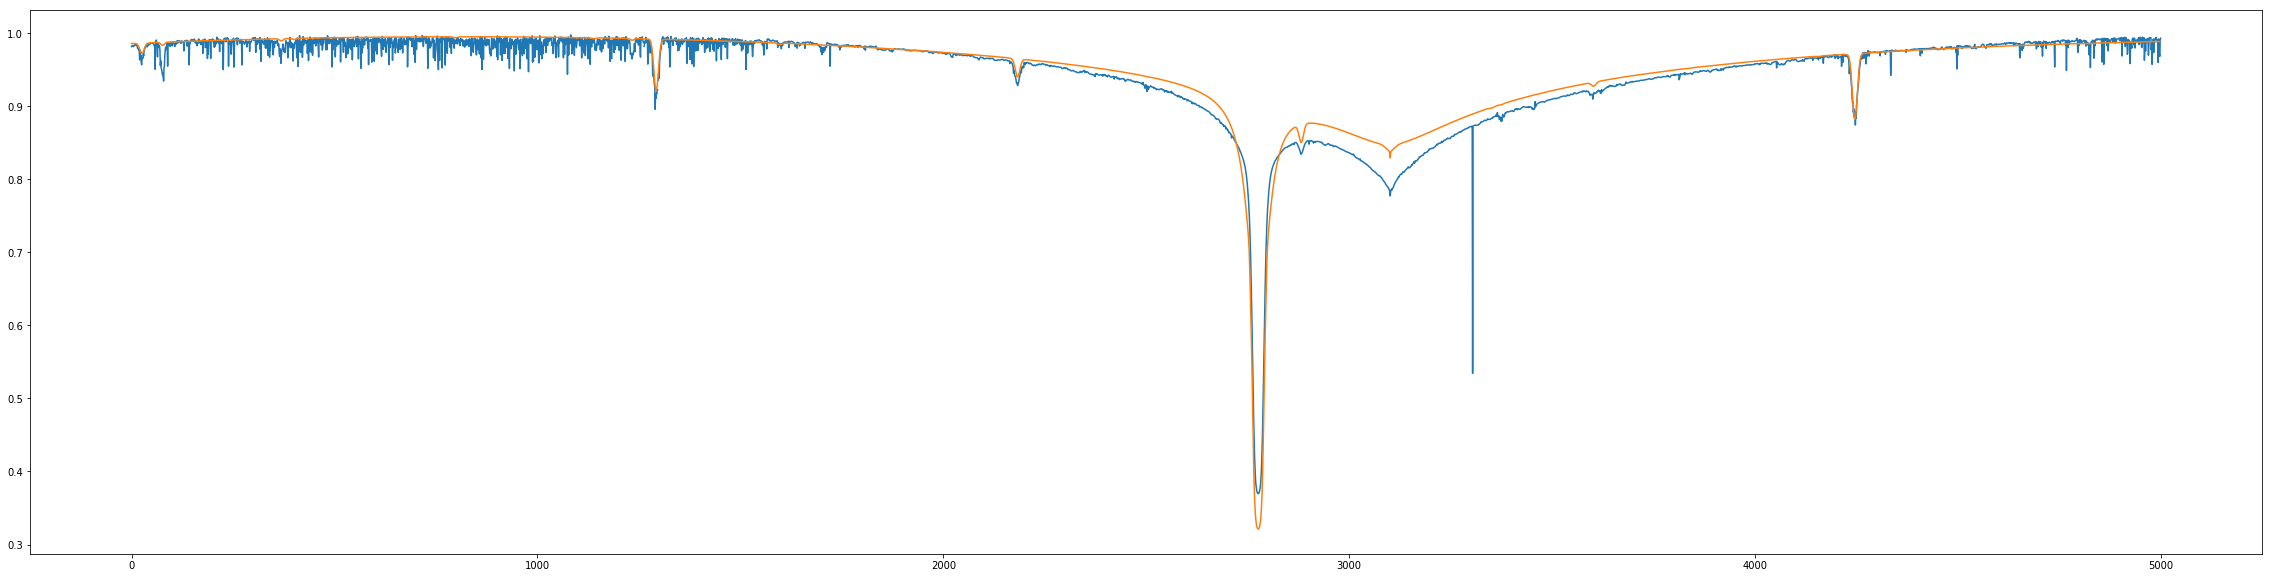

In [8]:
INDEX = 93

reconstruction = vae.reconstruct(normalized_spectra[INDEX])
reconstruction[reconstruction == 0] = np.nan # get rid of zeros just for the plot

plt.figure(figsize=(40,10))
plt.plot(reconstruction[10000:15000])
plt.plot(normalized_spectra[INDEX][10000:15000])

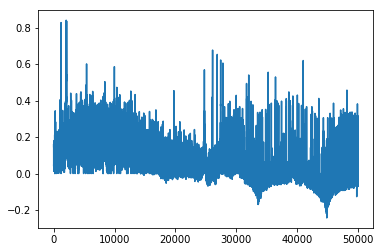

In [43]:
plt.plot(vae.reconstruct(normalized_spectra[0])-vae.reconstruct(normalized_spectra[2]))

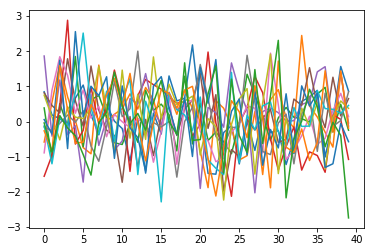

In [14]:
plt.plot(vae.transform(normalized_spectra[0]))
plt.plot(vae.transform(normalized_spectra[1]))
plt.plot(vae.transform(normalized_spectra[2]))
plt.plot(vae.transform(normalized_spectra[3]))
plt.plot(vae.transform(normalized_spectra[4]))
plt.plot(vae.transform(normalized_spectra[5]))
plt.plot(vae.transform(normalized_spectra[6]))
plt.plot(vae.transform(normalized_spectra[7]))
plt.plot(vae.transform(normalized_spectra[8]))
plt.plot(vae.transform(normalized_spectra[9]))
plt.plot(vae.transform(normalized_spectra[10]))
plt.plot(vae.transform(normalized_spectra[11]))
plt.plot(vae.transform(normalized_spectra[12]))

In [15]:
outfile_name = 'output/output-{}'.format(datetime.now().strftime('%y%m%d-%H%M%S'))
vae.save(outfile_name)

saved to output/output-190926-233445


In [16]:
vae.close()